In [1]:
#import pandas and os library in Jupyter Notebook environment:
import pandas as pd
import numpy as np
import os

In [5]:
dataset2 = pd.read_csv(r"C:\Users\hp\Desktop\New folder\Churn_Modelling.csv")
dataset2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
#Removing RowNumber column(do not give any meaningful information for the classification)
dataset2.drop('RowNumber', axis=1, inplace=True)

# Shape of our dataset
dataset2.shape

# Info our dataset
dataset2.info()

# Describe our dataset
dataset2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [34]:
#Check for missing values
dataset2.isnull().sum()
dataset2

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
#To view the unique datasets
dataset2["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [24]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\hp\AppData\Local\Temp\ipykernel_4780\3476534209.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset2.corr(), annot = True)


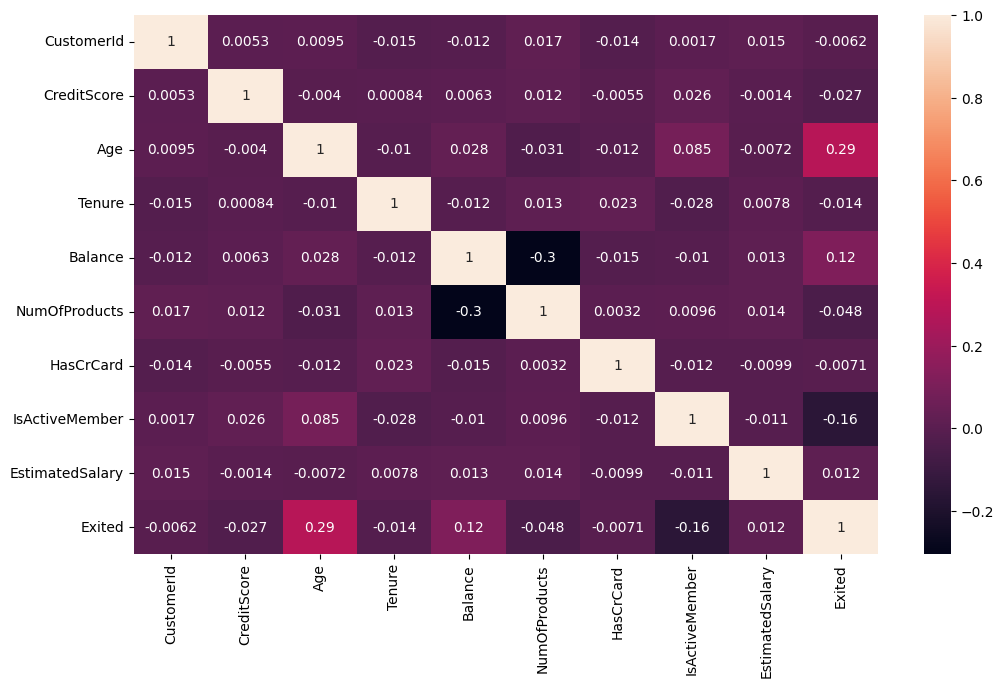

In [33]:
#correlation between different variables
# Visualizing the data using heatmap
plt.figure(figsize = (12,7))
sns.heatmap(dataset2.corr(), annot = True)
plt.show()

In [98]:
y = dataset2["Exited"]

In [99]:
dataset2["Surname"]= dataset2["Surname"].astype("category")
dataset2["Surname"]= dataset2["Surname"].cat.codes

dataset2["Geography"]= dataset2["Geography"].astype("category")
dataset2["Geography"]= dataset2["Geography"].cat.codes

dataset2["Gender"]= dataset2["Gender"].astype("category")
dataset2["Gender"]= dataset2["Gender"].cat.codes

dataset2


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [100]:
dataset2

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [101]:
x=dataset2.drop(columns="Exited")
x

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88
1,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58
2,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57
3,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63
4,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64
9996,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58
9998,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52


In [83]:
y = dataset2["Exited"]

In [84]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=27)

x_train

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5065,15775709,1967,832,0,0,27,10,98590.25,1,1,0,30912.89
8448,15717191,878,508,0,1,49,1,93817.41,2,1,1,132468.76
2469,15630617,1573,727,1,1,36,6,140418.81,1,1,1,113033.73
3836,15602797,2023,645,2,0,49,5,110132.55,3,0,1,187689.91
9753,15705174,485,656,1,1,68,7,153545.11,1,1,1,186574.68
...,...,...,...,...,...,...,...,...,...,...,...,...
7192,15644400,80,709,0,1,44,9,128601.98,1,1,0,117031.20
4848,15807167,1438,635,0,1,42,1,146766.72,2,0,1,164357.10
3912,15655590,966,581,2,1,46,2,79385.21,2,0,0,188492.82
3768,15685920,1587,599,2,1,34,2,101506.66,1,0,0,198030.24


In [85]:
x_test

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1208,15616451,984,697,0,0,47,6,128252.66,1,1,1,168053.40
4426,15749557,452,707,0,0,44,6,0.00,2,1,1,192542.17
4730,15576550,2679,619,2,0,38,1,0.00,1,1,0,112442.63
2912,15628972,1910,699,1,1,32,1,123906.22,3,1,1,127443.82
2618,15724834,2831,498,0,0,30,1,0.00,2,0,0,135795.53
...,...,...,...,...,...,...,...,...,...,...,...,...
8958,15710726,1242,573,0,1,52,8,0.00,2,0,1,178229.04
4376,15659820,641,614,0,0,34,5,0.00,2,1,0,185561.89
2354,15669342,878,731,1,1,35,2,127862.93,2,1,0,139083.70
9797,15721383,1129,627,2,1,40,10,0.00,2,1,1,194792.42


In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

In [88]:
x_train_scaled= scaler.fit_transform(x_train)

In [89]:
x_test_scaled= scaler.transform(x_test)

In [90]:
x_train_scaled

array([[ 1.17943099,  0.5535212 ,  1.87861779, ...,  0.65309534,
        -1.03252879, -1.202206  ],
       [ 0.36467348, -0.73285716, -1.47444905, ...,  0.65309534,
         0.968496  ,  0.56269691],
       [-0.84071317,  0.08810975,  0.79197576, ...,  0.65309534,
         0.968496  ,  0.22494252],
       ...,
       [-0.49300923, -0.6289074 , -0.71897411, ..., -1.53117001,
        -1.03252879,  1.53631888],
       [-0.07071874,  0.10464721, -0.53269262, ..., -1.53117001,
        -1.03252879,  1.70206627],
       [ 0.17722551, -1.19354363,  0.51255352, ...,  0.65309534,
        -1.03252879,  0.37726265]])

In [91]:
x_test_scaled

array([[-1.03794915, -0.60764494,  0.48150661, ...,  0.65309534,
         0.968496  ,  1.18110956],
       [ 0.8153116 , -1.23606854,  0.58499633, ...,  0.65309534,
         0.968496  ,  1.60669108],
       [-1.59349854,  1.39456932, -0.32571319, ...,  0.65309534,
        -1.03252879,  0.21467   ],
       ...,
       [-0.30153746, -0.73285716,  0.83337165, ...,  0.65309534,
        -1.03252879,  0.67765557],
       [ 0.42303952, -0.43636408, -0.24292141, ...,  0.65309534,
         0.968496  ,  1.64579736],
       [-1.63181517,  1.63554378, -2.09538736, ...,  0.65309534,
        -1.03252879, -0.31438967]])

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
log_reg= LogisticRegression(random_state=0).fit(x_train_scaled,y_train)

In [94]:
log_reg.predict(x_train_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
log_reg.score(x_train_scaled,y_train)

0.8067142857142857

In [96]:
log_reg.score(x_test_scaled,y_test)

0.8113333333333334